<a href="https://colab.research.google.com/github/machio1985/deep-learning-from-scratch/blob/master/deep_learning_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# deep-learning-from-scratch

作成：2021/07/04

In [10]:
#%cd /content/drive/MyDrive

In [11]:
#!git clone https://github.com/machio1985/deep-learning-from-scratch.git

## ch01


### P11

In [12]:
# coding: utf-8
class Man:
    """サンプルクラス"""

    def __init__(self,name):
        self.name = name
        print("Initilized!")

    def hello(self):
        print("Hello " + self.name + "!")

    def goodbye(self):
        print("Good-bye " + self.name + "!")

m = Man("David")
m.hello()
m.goodbye()

Initilized!
Hello David!
Good-bye David!


* クラスを定義する時にはselfで初期化が必要。


### P15

In [13]:
import numpy as np

X = np.array([[51,55],[14,19],[0,4]])
print(X)

[[51 55]
 [14 19]
 [ 0  4]]


In [14]:
for row in X:
  print(row)

[51 55]
[14 19]
[0 4]


### P17

In [15]:
import matplotlib.pyplot as plt
x = np.arange(0,6,0.1)
y = np.sin(x)

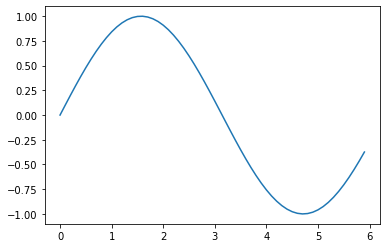

In [16]:
plt.plot(x,y)
plt.show()

## ch02


### P25

In [17]:
def AND(x1,x2):
  w1,w2,theta = 0.5,0.5,0.7
  tmp = x1*w1 + x2*w2 
  if tmp <= theta :
    return 0
  elif tmp > theta:
    return 1

In [18]:
AND(0,0)

0

In [19]:
AND(1,0)

0

In [20]:
AND(0,1)

0

In [21]:
AND(1,1)

1

### 2,3.2 重みとバイアス

In [22]:
import numpy as np
x = np.array([ 0 , 1 ])
w = np.array([ 0.5 , 0.5 ])
b = -0.7 

w*x

np.sum(w*x) + b

-0.19999999999999996

### 2.3.3 実装


In [23]:
def AND(x1,x2):
  x = np.array([ x1 , x2 ])
  w = np.array([ 0.5 , 0.5 ])
  b = -0.7 
  tmp = sum(x*w) + b 
  if tmp <= 0 :
    return 0
  else: 
    return 1

In [24]:
# NAND は ともに1の時だけ0
def NAND(x1,x2):
  x = np.array([ x1 , x2 ])
  w = np.array([ -0.5 , -0.5 ])
  b = 0.7 
  tmp = sum(x*w) + b 
  if tmp <= 0 :
    return 0
  else :
    return 1

# ORはどちらかが1なら1
def OR(x1,x2):
  x = np.array([ x1 , x2 ])
  w = np.array([ 0.5 , 0.5 ])
  b = -0.2 
  tmp = sum(x*w) + b 
  if tmp <= 0 :
    return 0
  else :
    return 1

### XOR 
* XOR は　線形で分けれない。　　

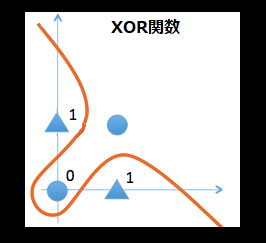

In [25]:
def XOR(x1 , x2):
  s1 = NAND(x1,x2)
  s2 = OR(x1,x2)
  y = AND(s1,s2)
  return y 

In [26]:
XOR(1,0)

1

##ch03　


### 非線形関数

In [27]:
def step_function(x):
   y = x > 0
   return y.astype(np.int)

In [28]:
import numpy as np
x = np.array([-1.0,1.0,2.0])
x 

array([-1.,  1.,  2.])

In [29]:
y = x > 0 
y

array([False,  True,  True])

In [30]:
y = y.astype(np.int)
y

array([0, 1, 1])

### ステップ関数

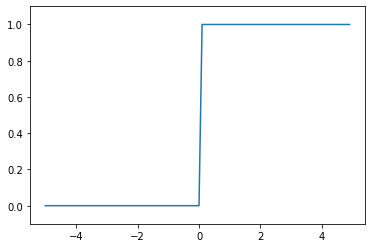

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
  return np.array(x>0 , dtype = np.int) 

#arangeは15から5を0.1刻み。
x = np.arange(-5.0,5.0,0.1)
y = step_function(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

### シグモイド関数


In [32]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [33]:
x = np.array([-1,1,2])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

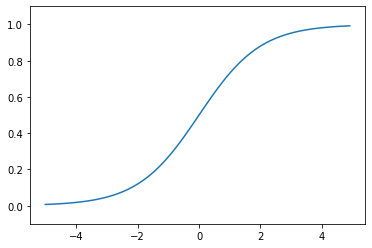

In [34]:
x = np.arange(-5,5,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

### ニューラルネットワークの行列の積


In [35]:
X = np.array([1,2])
X.shape

(2,)

In [36]:
W = np.array([[1,3,5],[2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [37]:
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


###ニューラルネットワークの実装

In [38]:
#１層目
X = np.array([1,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

#dotは行列の積
A1 = np.dot(X,W1) + B1
A1

array([0.3, 0.7, 1.1])

In [39]:
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [40]:
#２層目
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])
A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

In [41]:
#出力層

#これはそのまま出す恒等関数
def identity_function(x):
  return x 

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])
A3 = np.dot(Z2,W3) + B3
Z2 = sigmoid(A3)
Y = identity_function(A3)
Y

array([0.31682708, 0.69627909])

### 実装まとめ


In [42]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
  network['B1'] = np.array([0.1,0.2,0.3])

  network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
  network['B2'] = np.array([0.1,0.2])
  network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
  network['B3'] = np.array([0.1,0.2])

  return network

In [43]:
def forword(network,x):
  W1,W2,W3 = network['W1'] , network['W2'] , network['W3']
  B1,B2,B3 = network['B1'] , network['B2'] , network['B3']

  a1 = np.dot(x , W1) + B1 
  z1 = sigmoid(a1)
  a2 = np.dot(z1 , W2) + B2
  z2 = sigmoid(a2)
  a3 = np.dot(z2,W3) + B3 
  y = identity_function(a3)

  return y

In [44]:
network = init_network()
x = np.array([1.0,0.5])
y = forword(network,x)
print(y)

[0.31682708 0.69627909]


### 出力層の設計

* 回帰の時は恒等関数。分類の時はソフトマックス関数

In [45]:
a = np.array([0.3,2.9,4.0])
exp_a = np.exp(a)
exp_a

array([ 1.34985881, 18.17414537, 54.59815003])

In [46]:
sum_exp_a = np.sum(exp_a)
sum_exp_a

74.1221542101633

In [47]:
y = exp_a/sum_exp_a
y

array([0.01821127, 0.24519181, 0.73659691])

In [48]:
#softmax
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [49]:
#大きすぎるとオーバーフローする。
a = np.array([1010,1000,990])
exp_a = np.exp(a)/np.sum(exp_a)
exp_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


array([inf, inf, inf])

In [50]:
c = np.max(a)
a-c

array([  0, -10, -20])

In [51]:
np.exp(a-c)/np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [52]:
#オーバーフロー対策をするsoftmax
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [53]:
a = np.array([0.3,2.9,4.0])
y = softmax(a)
y

array([0.01821127, 0.24519181, 0.73659691])

In [54]:
sum(y)

1.0

* yは0~1の間。yの総和は1
* ゆえにyを確率的に取り扱える

### MNIST

In [55]:
#!python /content/drive/MyDrive/deep-learning-from-scratch/dataset/mnist.py

In [56]:
import os , pickle , sys

In [57]:
%cd /content/drive/MyDrive/deep-learning-from-scratch
os.getcwd()

/content/drive/MyDrive/deep-learning-from-scratch


'/content/drive/MyDrive/deep-learning-from-scratch'

In [58]:
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [59]:
(x_train,t_train),(x_test,t_test) = load_mnist(flatten = True ,normalize = False)

In [60]:
x_train.shape,t_train.shape,x_test.shape,t_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [61]:
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 形状を元の画像サイズに変形
print(img.shape)  # (28, 28)

5
(784,)
(28, 28)


In [62]:
img_show(img)

In [63]:
# neuralnet_mnist.py
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1 #累積和

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [64]:
x,_ = get_data()
network = init_network()
W1,W2,W3 = network['W1'] , network['W2'] , network['W3']

x.shape , x[0].shape , W1.shape , W2.shape , W3.shape

((10000, 784), (784,), (784, 50), (50, 100), (100, 10))

In [65]:
# バッチ処理 : 入力データをある程度のまとめ理で推論処理して、計算を早くする。
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x) , batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p= np.argmax(y_batch,axis=1) # 最も確率の高い要素のインデックスを取得
    accuracy_cnt += np.sum(p == t[i:i+batch_size]) #累積和

print("Accuracy:" + str(float(accuracy_cnt) / len(x) ))

Accuracy:0.9352


## ch04　学習


* 学習とは重みパラメーターの値を獲得すること。
* コンピュータービジョンで有名な特徴量  
 * SIFT
 * SURF
 * HOG  
   * これらは機械学習にかける

### 損失関数


In [66]:
#二乗和誤差
def sum_squared_error(y , t):
  return 0.5*np.sum((y-t)**2)

In [67]:
#交差エントロピー誤差
def cross_entropy_error(y , t): 
    delta = 1e-7
    return -np.sup(t * np.log(y + delta))

### ミニバッチ学習

* 全てのデータで損失関数を計算するのは負荷が大きい。
* そのため、一部(ミニバッチ)を取り出し、それごとに学習を行う。


In [68]:
%cd /content/drive/MyDrive/deep-learning-from-scratch
import sys , os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

/content/drive/MyDrive/deep-learning-from-scratch


In [69]:
(x_train,t_train),(x_test,t_test) = load_mnist(flatten = True ,normalize = False)

In [70]:
x_train.shape , t_train.shape

((60000, 784), (60000,))

In [71]:
# ランダムに取り出す。
train_size = x_train.shape[0] # 0列目
batch_size = 10
batch_mask = np.random.choice(train_size , batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

### 交差エントロピー誤差の実装：ミニバッチ

In [72]:
#交差エントロピー誤差:データが一つの場合
def cross_entropy_error(y , t): 
  if y.ndim == 1:
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)

    batch_size = y.shape[0]

    return -np.sup(t * np.log(y + 1e-7)/batch_size)

In [73]:
#交差エントロピー誤差:教師データがラベルの時
def cross_entropy_error(y , t): 
  if y.ndim == 1:
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)

    batch_size = y.shape[0]

    return -np.sup(np.log(y[np.arange(batch_size),t] + 1e-7))/batch_size

In [74]:
# 0 ~ 5-1
np.arange(5) 

array([0, 1, 2, 3, 4])

## 数値微分

In [75]:
def numerical_diff(f,x):
  h = 1e-4
  return (f(x+h) - f(x-h))/(2*h)

数値微分の例


In [76]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

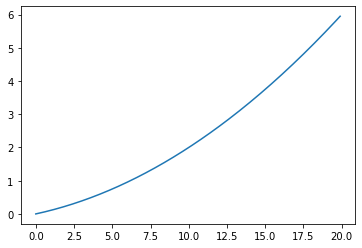

In [77]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0 , 20 , 0.1)
y = function_1(x)
plt.plot(x,y)
plt.show()

### 偏微分

In [78]:
def function_2(x):
  return np.sum(x ** 2)

In [79]:
def function_tmp1(x0):
  return x0*x0 + 4.0**2.0

In [80]:
numerical_diff(function_tmp1,3)

6.00000000000378

In [81]:
def function_tmp2(x1):
  return 3**2 + x1*x1

In [82]:
numerical_diff(function_tmp2,4)

7.999999999999119

### 勾配

In [83]:
def numerical_gradient(f,x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]
    
    # f(x+h)
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h)
    x[idx] = tmp_val - h 
    fxh2 = f(x)
    grad[idx] = (fxh1 - fxh2) / (2*h)
    
    x[idx] = tmp_val

  return grad   

In [84]:
numerical_gradient(function_2, np.array([3.0,4.0]))

array([6., 8.])

In [85]:
numerical_gradient(function_2, np.array([0.0,2.0]))

array([0., 4.])

In [86]:
numerical_gradient(function_2, np.array([3.0,0.0]))

array([6., 0.])

* インデントが揃ってないせいで、数値が合わないミス。。。

### 勾配法

In [87]:
def gradient_decent(f, init_X, lr = 0.01 , step_num =100):
  x = init_X

  for i in range(step_num):
    grad = numerical_gradient(f,x)
    x -= lr*grad

  return x

In [88]:
def function_2(x):
  return sum(x**2)

init_X = np.array([-3.0,4.0])

gradient_decent(function_2,init_X=init_X , lr = 10 ,step_num =100)

array([-2.58983747e+13, -1.29524862e+12])

In [89]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax , cross_entropy_error
from common.gradient import numerical_gradient 


In [90]:
class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3)

  def predict(self,x):
    return np.dot(x,self.W)#dotは内積

  def loss(self,x,t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y,t)

    return loss

In [91]:
net = simpleNet()
print(net.W)

[[ 0.32308721  1.51111324 -1.34078905]
 [-0.71158192  0.01023069  0.60123312]]


In [92]:
x = np.array([0.6,0.9])
p = net.predict(x)
p

array([-0.4465714 ,  0.91587557, -0.26336362])

In [93]:
np.argmax(p)

1

In [94]:
t = np.array([0,0,1])
net.loss(x,t)

1.6261950727241394

In [95]:
def f(W):
  return net.loss(x,t)

In [96]:
dW = numerical_gradient(f,net.W)
dW

array([[ 0.09825104,  0.38374288, -0.48199392],
       [ 0.14737655,  0.57561433, -0.72299088]])

### 学習アルゴリズムの実装

In [97]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from common.functions import *
from common.gradient import numerical_gradient 

In [98]:
class TwoLayerNet:

  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
      self.params = {}
      self.params['W1'] = weight_init_std * np.random.randn(input_size,hidden_size)#第1層の重み
      self.params['b1'] = np.zeros(hidden_size)#第1層のバイアス
      self.params['W2'] = weight_init_std * np.random.randn(hidden_size,output_size)#第2層の重み
      self.params['b2'] = np.zeros(output_size)#第2層のバイアス
    
  def predict(self,x):
      W1,W2 = self.params['W1'], self.params['W2'] 
      b1,b2 = self.params['b1'], self.params['b2']

      a1 = np.dot(x,W1) + b1  
      z1 = sigmoid(a1)
      a2 = np.dot(z1,W2) + b2
      y = softmax(a2)

      return y

  def load(self,x,t):
      y = self.predict(x)#xは画像データ

      return cross_entropy_error(y,t)

  def accuracy(self,x,t):
      y = self.predict(x)
      y = np.argmax(y,axis = 1)
      t = np.argmax(t,axis = 1)

      accuracy =np.sum(y==t)/float(x.shape[0])
      return accuracy

  def numerical_gradient(self,x,t):
      loss_W = lambda W: self.loss(x,t)
    
      grads = {}
      grads['W1'] = numarical_gradient(loss_W , self.params['W1'])#第1層の重みの勾配
      grads['b1'] = numarical_gradient(loss_W , self.params['b1'])#第1層のバイアスの勾配
      grads['W2'] = numarical_gradient(loss_W , self.params['W2'])#第2層の重みの勾配
      grads['b2'] = numarical_gradient(loss_W , self.params['b2'])#第2層のバイアスの勾配

      return grads

* TwoLayerNetクラスにはparams と　grads というインスタンス変数を持つ

In [99]:
net = TwoLayerNet(input_size=784,hidden_size=100,output_size=10)
net.params['W1'].shape

(784, 100)

In [100]:
x = np.random.rand(100,784)
y = net.predict(x)

* two_layer_net.pyから引用 

In [101]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient
import numpy as np


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads


In [102]:
import numpy as np
from dataset.mnist import load_mnist
from common.gradient import numerical_gradient 

learning_rate = 0.1

(x_train,t_train),(w_test,t_test) = load_mnist(normalize = True , one_hot_label = True)

train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
lerning_rate = 0.1

network = TwoLayerNet(input_size=28*28 , hidden_size=50 , output_size=10)

#for i in range(iters_num):
#  batch_mask = np.random.choice(train_size,batch_size)
#  x_batch = x_train[batch_mask]
#  t_batch = t_train[batch_mask]

#  grad = network.numerical_gradient(x_batch,t_batch)

#  for key in ('W1','b1','W2','b2'):
#    network.params[key] -= learning_rate * grad[key]

#  loss = network.loss(x_batch,t_batch)
#  train_loss_list.append(loss)

* ↑はミニバッチに対する損失関数の値。trainに対する値。#なぜかすごい時間かかって実行できなかった。
* ↓validに対する評価を実施する。

In [103]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

#for i in range(iters_num):
#    batch_mask = np.random.choice(train_size, batch_size)
#    x_batch = x_train[batch_mask]
#    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
#    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
#    for key in ('W1', 'b1', 'W2', 'b2'):
#        network.params[key] -= learning_rate * grad[key]
    
#    loss = network.loss(x_batch, t_batch)
#    train_loss_list.append(loss)
    
#    if i % iter_per_epoch == 0:
#        train_acc = network.accuracy(x_train, t_train)
#        test_acc = network.accuracy(x_test, t_test)
#        train_acc_list.append(train_acc)
#        test_acc_list.append(test_acc)
#        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
#markers = {'train': 'o', 'test': 's'}
#x = np.arange(len(train_acc_list))
#plt.plot(x, train_acc_list, label='train acc')
#plt.plot(x, test_acc_list, label='test acc', linestyle='--')
#plt.xlabel("epochs")
#plt.ylabel("accuracy")
#plt.ylim(0, 1.0)
#plt.legend(loc='lower right')
#plt.show()

## ch05 誤差逆伝播法

* 計算グラフでは、計算は局所的なものである。
* 計算グラフでは、逆方向の伝播によって、微分を効率よく計算できる  
   * 各変数の微分の値を効率よく求めれる.
* 連鎖律：『ある関数が合成関数で表される場合、その合成関数の微分は、合成関数を構成するそれぞれの関数の微分の積によって表すことができる。』

　

### 単純なレイヤの実装

In [104]:
# 乗算レイヤ
# dout:微分
class MulLayer:
  def __init__(self):
    self.x = None
    self.y = None

  def forward(self,x,y):
    self.x = x
    self.y = y
    out = x*y
    return out

  def backward(self,dout):
    dx = dout * self.y
    dy = dout * self.x
    return dx , dy

In [105]:
#りんごの順伝播
apple = 100
apple_num = 2
tax =1.1

#layer 
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

#forward 
apple_price = mul_apple_layer.forward(apple,apple_num)
price = mul_tax_layer.forward(apple_price,tax)

print(price)

220.00000000000003


In [106]:
# backward 
dprice = 1

dapple_price ,dtax = mul_tax_layer.backward(dprice)
dapple,dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple,dapple_num,dtax)

2.2 110.00000000000001 200


In [107]:
# 加算レイヤ
# passは何も行わないということ。
class AddLayer:
  def __init__(self):
    pass

  def forward(self,x,y):
    out = x + y
    return out

  def backward(self,dout):
    dx = dout * 1
    dy = dout * 1
    return dx , dy

In [108]:
#りんごとオレンジのの順伝播
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax =1.1

#layer 
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

#forward 
apple_price = mul_apple_layer.forward(apple,apple_num)
orange_price = mul_orange_layer.forward(orange,orange_num)
all_price = add_apple_orange_layer.forward(apple_price,orange_price)
price = mul_tax_layer.forward(all_price,tax)

#backward
dprice = 1
dall_price ,dtax = mul_tax_layer.backward(dprice)
dapple_price,dorange_price = add_apple_orange_layer.backward(dall_price)
dorange , dorange_num = mul_orange_layer.backward(dorange_price)
dapple , dapple_num = mul_orange_layer.backward(dapple_price)

print(price)
print(dorange , dorange_num ,dapple , dapple_num)

715.0000000000001
3.3000000000000003 165.0 3.3000000000000003 165.0


### 活性化関数レイヤ 

In [109]:
class Relu:
  def __init__(self):
    self.mask = None

  def forward(self,x):
    self.mask = (x <= 0)
    out = x.copy()
    out[self.mask] = 0

    return out

  def backward(self , dout):
    dout[self.mask] = 0
    dx = dout 
    return dx

* mask変数は0より小さいとT/0より大きいとFを返す

In [110]:
x = np.array([[1.0,-0.5],[-2.0,3.0]])
x

array([[ 1. , -0.5],
       [-2. ,  3. ]])

In [111]:
mask = (x<=0)
mask

array([[False,  True],
       [ True, False]])

In [112]:
# sigmoidレイヤ

class Sigmoid:
  def __init__(self):
    self.out = None

  def forward(self,x):
    out = 1/(1+np.exp(-x))
    self.out = out

    return out

  def backward(self,dout):
    dx = dout * (1.0 - self.out) * self.out

    return dx

### Affine/Softmax

*  ニューラルネットワークの順伝播を行う行列の積の事をアフィン変換という。

In [113]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 入力データの形状に戻す（テンソル対応）
        return dx

In [114]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None # softmaxの出力
        self.t = None # 教師データ

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dx


### 誤差逆伝播法

* ステップ1：ミニバッチ - 訓練データの中からランダムに一部のデータを選び出す
* ステップ2：勾配の算出 - 各重みパラメータに関する損失関数の勾配を求める
* ステップ3：パラメータの更新：重みを購買方向に微少量だけ更新する。
* ステップ4：ステップ1~3を繰り返す  
  
  誤差逆伝播法はステップ２で利用する。



In [131]:
import sys , os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
  def __init__(self , input_size , hidden_size , output_size , weight_init_std = 0.01):

      #重みの初期化
      self.params = {}
      self.params['W1'] = weight_init_std * np.random.randn(input_size , hidden_size)
      self.params['b1'] = np.zeros(hidden_size)
      self.params['W2'] = weight_init_std * np.random.randn(hidden_size , output_size)
      self.params['b2'] = np.zeros(output_size)
     
     #レイヤの生成
      self.layers = OrderedDict()
      self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
      self.layers['Relu1'] = Relu()
      self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
     
      self.lastLayer = SoftmaxWithLoss()

  def predict(self , x):
    for layer in self.layers.values():
      x = layer.forward(x)

      return x

  def loss(self,x,t):
    y = self.predict(x)
    return set.lastLayer.forward(y,t)

  def accuracy(self,x,t):
    y = self.predict(x)
    y = np.argmax(y , axis = 1)
    if t.ndim != 1 : t = np.argmax(t,axis =1)
    
    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy

  def numerical_gradient(self,x,t):
    loss_W = lambda W: self.loss(x,t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

  def gradient(self , x ,t):
    #forward
    self.loss(x,t)
    
    #backward
    dout = 1
    dout = self.lastLayer.backward(dout)

    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout = layer.backward(dout)

    grads = {}
    grads['W1'] = numerical_gradient(self.layers['W1'])
    grads['b1'] = numerical_gradient(self.layers['b1'])
    grads['W2'] = numerical_gradient(self.layers['W2'])
    grads['b2'] = numerical_gradient(self.layers['b2'])

    return grads

In [139]:
os.chdir('/content/drive/MyDrive/deep-learning-from-scratch/ch05') 
#勾配確認
import sys,os 
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train,t_train) , (x_test,t_test) = load_mnist(normalize = True , one_hot_label= True)

network = TwoLayerNet(input_size= 28**2, hidden_size = 50 , output_size= 10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch,t_batch)
grad_backprop = network.gradient(x_batch,t_batch)

for key in grad_numerical.keys():
  diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
  print(key + ":" + str(diff))

W1:3.947628264672959e-10
b1:2.3084164512039447e-09
W2:5.979905714674814e-09
b2:1.3987383567920508e-07


In [142]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)


0.05248333333333333 0.0525
0.9058166666666667 0.9099
0.9234833333333333 0.9253
0.9382833333333334 0.9377
0.9451 0.9404
0.9517666666666666 0.951
0.9562333333333334 0.9529
0.9590333333333333 0.9552
0.9625166666666667 0.9594
0.9661 0.9612
0.96845 0.962
0.9703 0.9627
0.9723166666666667 0.9644
0.9723666666666667 0.9629
0.97475 0.9674
0.9763 0.9666
0.9769166666666667 0.9673


## ch06 学習のテクニック

In [143]:
class SGD:
  def __init__(self,lr = 0.01):
    self.lr = lr

  def update(self,params,grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

In [153]:
class Momentum:
  def __init__(self, lr=0.01, momentum=0.9) :
       self.lr = lr
       self.momentum = momentum
       self.v = None
        
  def update(self, params, grads) :
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]

In [154]:
class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [155]:

class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)


### 様々なテクニック


* パラメーター更新  
  * SGDは不効率な探索経路。Adamがいい。
* weightの初期値  　　 
  * weight０はそのまま通すだけなので、微妙
  * 隠れ層の出力の分布の確認から得られるものが多い。  
  * 適度に広がっていることが求められる。
  * Xavierの重みの初期値：1/√nを初期値にする  
  * ただし、活性化関数が線形であることを前提にしている。
  * ReLuの場合の重み初期値：Heの初期値：2/√nを初期値にする  
* Batch Normalization  
  * Batch Normのメリット:学習を速くする
  * Batch Normのメリット:初期値にさほど依存しない
  * Batch Normのメリット:過学習の抑制
* 過学習への対応：正則化  
  * Weight decay :大きいWeightを持つことに対してペナルティを課している
  * Dropout : 隠れ層のニューロンを消去する
* ハイパラ
  *  　